# Large version of the Don Quixote generative model

Training cancelled at 1000 iterations, see `quixote-small` for the better (smaller) model.

Hyperparameters: 
```plaintext
Hyperparameters(block_size=1024, micro_steps=40, vocab_size=24540, n_layer=8, n_head=12, n_embd=516, dropout=0.0, bias=False, batch_size=32, epochs=10000, optimizer={'lr': 0.0006, 'betas': (0.9, 0.95), 'eps': 1e-09}, scheduler={'decay_lr': True, 'warmup': 2000, 'max': 600000, 'min_lr': 6e-05}, weight_decay=0.1, grad_clip=1.0, output_path='./output/', data_path='./dataset/quixote_oneline.txt', tokenizer={'path': None, 'bpe_path': './tokenization/tokenizer.model', 'k': None, 'special_symbols': {'[PAD]': 256, '[CLS]': 257, '[SEP]': 258}, 'vocab_size': 24540, 'tokenizer': None})
```

Transformer architecture: 
```plaintext
GPT(
  (transformer): ModuleDict(
    (wte): Embedding(
      (embedding): Embedding(24540, 516)
    )
    (wpe): Embedding(
      (embedding): Embedding(1024, 516)
    )
    (drop): Dropout(p=0.0, inplace=False)
    (h): ModuleList(
      (0-7): 8 x Block(
        (ln_1): LayerNorm()
        (attn): CausalSelfAttention(
          (c_attn): Linear(in_features=516, out_features=1548, bias=False)
          (c_proj): Linear(in_features=516, out_features=516, bias=False)
          (attn_dropout): Dropout(p=0.0, inplace=False)
          (resid_dropout): Dropout(p=0.0, inplace=False)
        )
        (ln_2): LayerNorm()
        (mlp): MLP(
          (c_fc): Linear(in_features=516, out_features=2064, bias=False)
          (gelu): GELU(approximate='none')
          (c_proj): Linear(in_features=2064, out_features=516, bias=False)
          (dropout): Dropout(p=0.0, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm()
  )
  (generator): Linear(in_features=516, out_features=24540, bias=False)
)
```

Vocabulary size: 24540

In [1]:
import torch
import pandas as pd

import sys
sys.path.append("..")

<Axes: xlabel='iteration (524288 training-tokens per iteration)'>

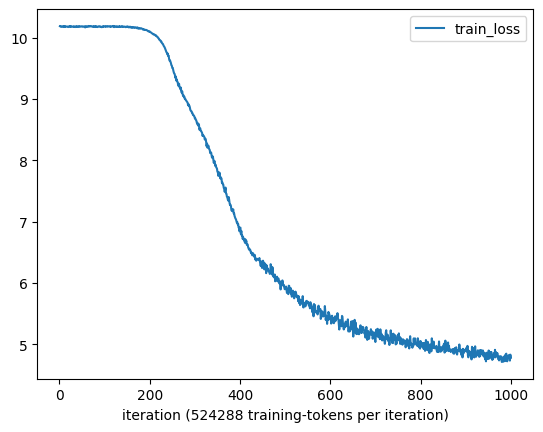

In [2]:
loss = pd.read_csv('loss.csv', header=0, index_col=0, usecols=[0, 1])
loss.index.name = f"iteration ({8 * 4 * 256 * 64} training-tokens per iteration)"
loss.plot()

In [3]:
model = torch.load("./quixote-large.pth", map_location=torch.device('cpu'))
model.config.device = "cpu"

In [4]:
prompt = "“Here is the apple of which I spoke,” said Don Quixote, to which Sancho replied"
generate = 100
top_k = None

In [5]:
print(f"\n\033[91m Prompt:\033[0m {prompt}")
for temperature in [1.0, 0.8, 0.5, 0.1]:
    print(f"\n\033[91m Temperature:\033[0m {temperature}")
    output = model(prompt, generate=generate, temperature=temperature, top_k=top_k)
    print(f"\033[91m quixote-large:\033[0m {output} ...")


 Prompt: “Here is the apple of which I spoke,” said Don Quixote, to which Sancho replied

 Temperature: 1.0
 quixote-large: “Here is the apple of which I spoke,” said Don Quixote, to which Sancho replied Don Quixote of bargain.” “In death. “Dulcinea,” said Sancho, “for I will he were so for all month, and liberty under Rocinante, now in this time, for a heartfelt Dapple without required (for I was or the duchess, but palm of. There is the books that she is no opportunity of hearing the city; and his think that plan be seen a good once, that the king and his power to the rinsings, Sancho; where enchanted love of its Dulcinea del Toboso. ...

 Temperature: 0.8
 quixote-large: “Here is the apple of which I spoke,” said Don Quixote, to which Sancho replied Sancho, “but I am an end of the lady, enemy of the feet, and the peerless Dulcinea are all the other, though there will fall and at least may be no urinary out of some other, the farmer; and you are her meadow which she has ever told hi